# 버스 2

## 0.준비

- GPU 학습

    - 런타임 - 런타임 유형 변경 - GPU

    - 아래 셀 실행 후 런타임 다시시작, 런타임 모두 실행

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install catboost

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

import folium

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/버스/train.csv')
test = pd.read_csv('/content/drive/MyDrive/버스/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/버스/submission_제출양식.csv')

## 과제

### 1) 가장 많은 버스가 다닌 상위 10개 정류장을 지도에 표시하기

In [4]:
stations = train.value_counts('now_station')[:10].index
stations

Index(['남국원(아라방면)', '아라주공아파트', '도호동', '인다마을', '은남동', '제원아파트', '동문로터리',
       '제주여자중고등학교(아라방면)', '삼무공원사거리', '청소년문화의집'],
      dtype='object', name='now_station')

In [5]:
locations = []
for station in stations:
  locations.append(train[train['now_station'] == station][['now_latitude','now_longitude']].iloc[0].values)

locations

[array([ 33.479705, 126.543811]),
 array([ 33.473655, 126.545425]),
 array([ 33.485662, 126.494923]),
 array([ 33.47145, 126.5454 ]),
 array([ 33.485822, 126.490897]),
 array([ 33.487531, 126.489892]),
 array([ 33.248683, 126.568347]),
 array([ 33.48486 , 126.542928]),
 array([ 33.4899  , 126.488917]),
 array([ 33.250433, 126.56505 ])]

In [7]:
center = [33.35, 126.5]

In [8]:
m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron',)

for i, location in enumerate(locations):
  folium.Circle(
      radius=300,
      location=location,
      fill=True
  ).add_to(m)

m

### 2) 가장 많은 정류장을 경유한 버스의 경로를 지도에 표시하기

In [9]:
train.value_counts('vh_id')

vh_id
7983038    3189
7983031    3164
7983074    2957
7983093    2840
7983097    2821
           ... 
7983000     410
7997077     248
7983401     228
7983051     216
7983403     114
Length: 104, dtype: int64

In [10]:
train[(train['vh_id'] == 7983038) & (train['date'] == '2019-10-15')][['now_latitude',	'now_longitude']].values

array([[ 33.248487, 126.511195],
       [ 33.247942, 126.514688],
       [ 33.247527, 126.518567],
       [ 33.244703, 126.543539],
       [ 33.247707, 126.552606],
       [ 33.249504, 126.558068],
       [ 33.251084, 126.559551],
       [ 33.251891, 126.560303],
       [ 33.250883, 126.56405 ],
       [ 33.249753, 126.565959],
       [ 33.248595, 126.568527],
       [ 33.250098, 126.571865],
       [ 33.251896, 126.574417],
       [ 33.264083, 126.6345  ],
       [ 33.275048, 126.663532],
       [ 33.275267, 126.667067],
       [ 33.274833, 126.670583],
       [ 33.275233, 126.675   ],
       [ 33.275933, 126.682   ],
       [ 33.27871 , 126.717774],
       [ 33.279567, 126.721017],
       [ 33.286633, 126.745967],
       [ 33.288294, 126.749002],
       [ 33.294367, 126.759183],
       [ 33.307334, 126.778434],
       [ 33.30655 , 126.800333],
       [ 33.306817, 126.804917],
       [ 33.307583, 126.808517],
       [ 33.321833, 126.830833],
       [ 33.323283, 126.831517],
       [ 3

In [11]:
locations = train[(train['vh_id'] == 7983038) & (train['date'] == '2019-10-15')][['now_latitude',	'now_longitude']].values

m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron',)

folium.PolyLine(locations=locations).add_to(m)

m

## 1.EDA - feature

In [ ]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


### 1) route_id	/ vh_id	/ route_nm

- vh_id를 알면 route_id, route_nm을 알 수 있다

In [ ]:
train[train['route_id'] == 405136001]['route_nm'].unique()

array(['360-1'], dtype=object)

In [ ]:
train[train['route_nm'] == '360-1']['route_id'].unique()

array([405136001])

In [ ]:
train[train['vh_id'] == 7997025]['route_id'].unique()

array([405136001])

In [ ]:
train[train['vh_id'] == 7997025]['route_nm'].unique()

array(['360-1'], dtype=object)

In [ ]:
def check(text:str):
  if (len(train[train['vh_id'] == text]['route_id'].unique()) != 1) | (len(train[train['vh_id'] == text]['route_nm'].unique()) != 1):
    return True
  else :
    return False

temp = list(map(check, train['vh_id'].unique()))
set(temp)

{False}

### 2) gps feature

In [ ]:
train[150:200]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
150,150,2019-10-15,405136001,7997025,360-1,33.485854,126.480530,노형오거리,20시,252.0,남녕고등학교,33.488046,126.483112,182
151,151,2019-10-15,405136001,7997025,360-1,33.488046,126.483112,남녕고등학교,20시,322.0,한라병원,33.489633,126.486000,132
152,152,2019-10-15,405136001,7997025,360-1,33.489633,126.486000,한라병원,20시,291.0,삼무공원사거리,33.489900,126.488917,148
153,153,2019-10-15,405136001,7997025,360-1,33.489900,126.488917,삼무공원사거리,20시,381.0,제원아파트,33.487531,126.489892,146
154,154,2019-10-15,405136001,7997025,360-1,33.487531,126.489892,제원아파트,21시,267.0,은남동,33.485822,126.490897,68
155,155,2019-10-15,405136001,7997025,360-1,33.485822,126.490897,은남동,21시,374.0,도호동,33.485662,126.494923,74
156,156,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,21시,321.0,연동주민센터,33.487317,126.496617,60
157,157,2019-10-15,405136001,7997025,360-1,33.487317,126.496617,연동주민센터,21시,455.0,제주도청 신제주로터리,33.491433,126.496783,98
158,158,2019-10-15,405136001,7997025,360-1,33.491433,126.496783,제주도청 신제주로터리,21시,528.0,연동입구,33.496203,126.496995,164
159,159,2019-10-15,405136001,7997025,360-1,33.496203,126.496995,연동입구,21시,753.0,오라3동,33.499250,126.503183,94


In [ ]:
train['temp'] = train['vh_id'].shift(-1)
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,temp
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,7997025.0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,7997025.0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,7997025.0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,7997025.0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,7997025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96,7983486.0
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50,7983486.0
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16,7983486.0
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38,7983486.0


In [ ]:
train[150:200]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,temp
150,150,2019-10-15,405136001,7997025,360-1,33.485854,126.480530,노형오거리,20시,252.0,남녕고등학교,33.488046,126.483112,182,7997025.0
151,151,2019-10-15,405136001,7997025,360-1,33.488046,126.483112,남녕고등학교,20시,322.0,한라병원,33.489633,126.486000,132,7997025.0
152,152,2019-10-15,405136001,7997025,360-1,33.489633,126.486000,한라병원,20시,291.0,삼무공원사거리,33.489900,126.488917,148,7997025.0
153,153,2019-10-15,405136001,7997025,360-1,33.489900,126.488917,삼무공원사거리,20시,381.0,제원아파트,33.487531,126.489892,146,7997025.0
154,154,2019-10-15,405136001,7997025,360-1,33.487531,126.489892,제원아파트,21시,267.0,은남동,33.485822,126.490897,68,7997025.0
155,155,2019-10-15,405136001,7997025,360-1,33.485822,126.490897,은남동,21시,374.0,도호동,33.485662,126.494923,74,7997025.0
156,156,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,21시,321.0,연동주민센터,33.487317,126.496617,60,7997025.0
157,157,2019-10-15,405136001,7997025,360-1,33.487317,126.496617,연동주민센터,21시,455.0,제주도청 신제주로터리,33.491433,126.496783,98,7997025.0
158,158,2019-10-15,405136001,7997025,360-1,33.491433,126.496783,제주도청 신제주로터리,21시,528.0,연동입구,33.496203,126.496995,164,7997025.0
159,159,2019-10-15,405136001,7997025,360-1,33.496203,126.496995,연동입구,21시,753.0,오라3동,33.499250,126.503183,94,7997025.0


In [ ]:
idx = [-1]
idx = idx + list(train[train['vh_id'] != train['temp']]['id'].values)

In [ ]:
idx

[-1,
 180,
 380,
 538,
 716,
 901,
 1086,
 1265,
 1421,
 1591,
 1780,
 1838,
 2050,
 2227,
 2408,
 2567,
 2763,
 2967,
 3145,
 3361,
 3566,
 3599,
 3782,
 3977,
 4161,
 4360,
 4529,
 4719,
 4919,
 5079,
 5234,
 5398,
 5592,
 5787,
 5967,
 6144,
 6298,
 6449,
 6656,
 6841,
 7098,
 7273,
 7497,
 7665,
 7825,
 7935,
 8209,
 8472,
 8718,
 8940,
 9146,
 9283,
 9491,
 9653,
 9910,
 10139,
 10334,
 10522,
 10775,
 10984,
 11172,
 11327,
 11543,
 11729,
 11858,
 11946,
 12038,
 12109,
 12181,
 12293,
 12401,
 12487,
 12591,
 12677,
 12856,
 12860,
 13011,
 13146,
 13299,
 13461,
 13639,
 13806,
 13952,
 14117,
 14281,
 14464,
 14630,
 14777,
 14789,
 14823,
 14964,
 15087,
 15220,
 15390,
 15536,
 15667,
 15848,
 15979,
 16167,
 16343,
 16531,
 16724,
 16908,
 17092,
 17206,
 17388,
 17578,
 17635,
 17815,
 17976,
 18170,
 18269,
 18454,
 18673,
 18892,
 19099,
 19283,
 19472,
 19612,
 19746,
 19914,
 20067,
 20225,
 20410,
 20601,
 20745,
 20907,
 21059,
 21227,
 21347,
 21525,
 21723,
 21910

In [ ]:
train.loc[idx[2]+1:idx[3]]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,temp
381,381,2019-10-15,405136001,7997035,360-1,33.479705,126.543811,남국원(아라방면),07시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,7997035.0
382,382,2019-10-15,405136001,7997035,360-1,33.493109,126.535091,제주지방법원(아라방면),07시,414.0,고산동산(아라방면),33.496007,126.532287,144,7997035.0
383,383,2019-10-15,405136001,7997035,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350,116,7997035.0
384,384,2019-10-15,405136001,7997035,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933,42,7997035.0
385,385,2019-10-15,405136001,7997035,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355,174,7997035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,534,2019-10-15,405136001,7997035,360-1,33.493109,126.535091,제주지방법원(아라방면),22시,525.0,제주중앙여자고등학교(아라방면),33.489414,126.538642,116,7997035.0
535,535,2019-10-15,405136001,7997035,360-1,33.489414,126.538642,제주중앙여자고등학교(아라방면),22시,642.0,제주여자중고등학교(아라방면),33.484860,126.542928,52,7997035.0
536,536,2019-10-15,405136001,7997035,360-1,33.484860,126.542928,제주여자중고등학교(아라방면),22시,578.0,남국원(아라방면),33.479705,126.543811,76,7997035.0
537,537,2019-10-15,405136001,7997035,360-1,33.456267,126.551750,제주대학교입구,22시,266.0,제대마을,33.457724,126.554014,20,7997035.0


In [ ]:
import folium

my_idx = 700

center = [((train[['now_latitude',	'now_longitude']].loc[1].values[0])+(train[['now_latitude',	'now_longitude']].loc[len(train)-1].values[0]))/2, 
          ((train[['now_latitude',	'now_longitude']].loc[1].values[1])+(train[['now_latitude',	'now_longitude']].loc[len(train)-1].values[1]))/2]

m = folium.Map(location=center, zoom_start=11)

locations = train.loc[idx[my_idx]+1:idx[my_idx+1]][['next_latitude', 'next_longitude']].values

folium.PolyLine(locations=locations).add_to(m)

m

### 3) station

#### a) 역 이름이 같으면 좌표도 같을까?

In [ ]:
pd.DataFrame(train.groupby(['now_station', 'now_latitude']).count().reset_index()[:50].value_counts('now_station'))

,0
now_station,
911의원,2
고성리제주은행,2
구좌중앙초등학교,2
구좌보건지소,2
교래입구,2
광치기해변,2
광지동,2
광대왓,2
관덕정,2


In [ ]:
train[train['now_station'] == '911의원']['now_latitude'].unique()

array([33.540617, 33.540685])

#### b) 좌표로 역 이름을 알 수 있을까?

- longitude를 알면 역 이름을 알 수 있다

In [ ]:
def check_station(text:str):
  if len(train[train['now_latitude'] == text]['now_station'].unique()) != 1:
    return True
  else :
    return False

In [ ]:
train[train['now_latitude'] == train['now_latitude'].unique()[3]]['now_station'].unique()

array(['남국원(아라방면)'], dtype=object)

In [ ]:
temp = list(map(check_station, train['now_latitude'].unique()))
set(temp)

{False, True}

In [ ]:
train['now_latitude'].unique()[temp]

array([33.275267, 33.274958, 33.4523  , 33.248487])

In [ ]:
train[train['now_latitude'] == train['now_latitude'].unique()[temp][3]]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,temp
6777,6777,2019-10-15,405320111,7983041,201-11,33.248487,126.512302,고래왓,12시,607.0,서귀포버스터미널,33.248726,126.508138,124,7983041.0
7394,7394,2019-10-15,405320112,7983063,201-12,33.248487,126.511195,대륜동주민센터,14시,189.0,서귀포버스터미널(가상정류소),33.249091,126.509224,46,7983063.0
7786,7786,2019-10-15,405320112,7983095,201-12,33.248487,126.511195,대륜동주민센터,15시,189.0,서귀포버스터미널(가상정류소),33.249091,126.509224,26,7983095.0
7839,7839,2019-10-15,405320112,7983224,201-12,33.248487,126.511195,대륜동주민센터,09시,329.0,고래왓,33.247942,126.514688,34,7983224.0
8177,8177,2019-10-15,405320113,7983075,201-13,33.248487,126.512302,고래왓,18시,607.0,서귀포버스터미널,33.248726,126.508138,228,7983075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210111,210111,2019-10-28,405328102,7983445,281-2,33.248487,126.511195,대륜동주민센터,18시,329.0,고래왓,33.247942,126.514688,34,7983445.0
210151,210151,2019-10-28,405328102,7983445,281-2,33.248487,126.511195,대륜동주민센터,22시,189.0,서귀포버스터미널(가상정류소),33.249091,126.509224,20,7983445.0
210162,210162,2019-10-28,405328102,7983485,281-2,33.248487,126.511195,대륜동주민센터,08시,189.0,서귀포버스터미널(가상정류소),33.249091,126.509224,38,7983485.0
210212,210212,2019-10-28,405328102,7983485,281-2,33.248487,126.511195,대륜동주민센터,13시,189.0,서귀포버스터미널(가상정류소),33.249091,126.509224,20,7983485.0


In [ ]:
def check_station(text:str):
  if len(train[train['now_longitude'] == text]['now_station'].unique()) != 1:
    return True
  else :
    return False

In [ ]:
temp = list(map(check_station, train['now_longitude'].unique()))
set(temp)

{False}

In [ ]:
train['now_longitude'].unique()[temp]

array([], dtype=float64)

In [ ]:
def check_station(text:str):
  if len(train[train['next_longitude'] == text]['next_station'].unique()) != 1:
    return True
  else :
    return False

In [ ]:
temp = list(map(check_station, train['next_longitude'].unique()))
set(temp)

{False}

In [ ]:
train['next_longitude'].unique()[temp]

array([], dtype=float64)

#### c) 역 이름은 같지만 좌표가 다른 경우 좌표별로 운행시간에 차이가 날까?

- 차이가 난다

In [ ]:
train[train['now_latitude'] == train[train['now_station'] == '911의원']['now_latitude'].unique()[0]]['next_arrive_time'].mean()

61.46067415730337

In [ ]:
train[train['now_latitude'] == train[train['now_station'] == '911의원']['now_latitude'].unique()[1]]['next_arrive_time'].mean()

84.9041095890411

In [ ]:
train[train['now_latitude'] == train[train['now_station'] == '고성리제주은행']['now_latitude'].unique()[0]]['next_arrive_time'].mean()

225.8507462686567

In [ ]:
train[train['now_latitude'] == train[train['now_station'] == '고성리제주은행']['now_latitude'].unique()[1]]['next_arrive_time'].mean()

113.875

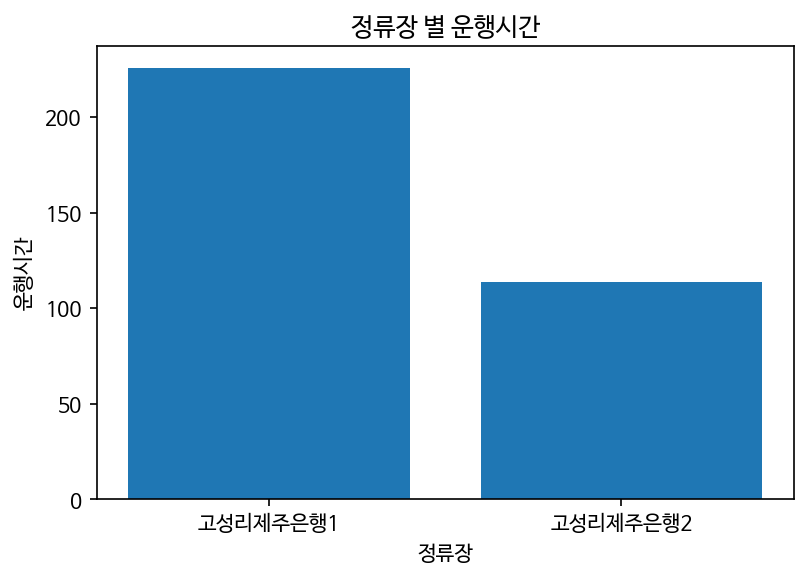

In [ ]:
x = ['고성리제주은행1', '고성리제주은행2']
y = [train[train['now_latitude'] == train[train['now_station'] == '고성리제주은행']['now_latitude'].unique()[0]]['next_arrive_time'].mean(),
     train[train['now_latitude'] == train[train['now_station'] == '고성리제주은행']['now_latitude'].unique()[1]]['next_arrive_time'].mean()]

plt.figure(dpi=150)

plt.title('정류장 별 운행시간')
plt.xlabel('정류장')
plt.ylabel('운행시간')

plt.bar(x,y)
plt.show()

### 5) now_arrive_time

In [ ]:
train['now_arrive_time'].value_counts().sort_index()

00시        5
05시      487
06시     8409
07시    13581
08시    13838
09시    13700
10시    13011
11시    12524
12시    13433
13시    13197
14시    12592
15시    12846
16시    13476
17시    13090
18시    12987
19시    13275
20시    11852
21시    11230
22시     6470
23시      454
Name: now_arrive_time, dtype: int64

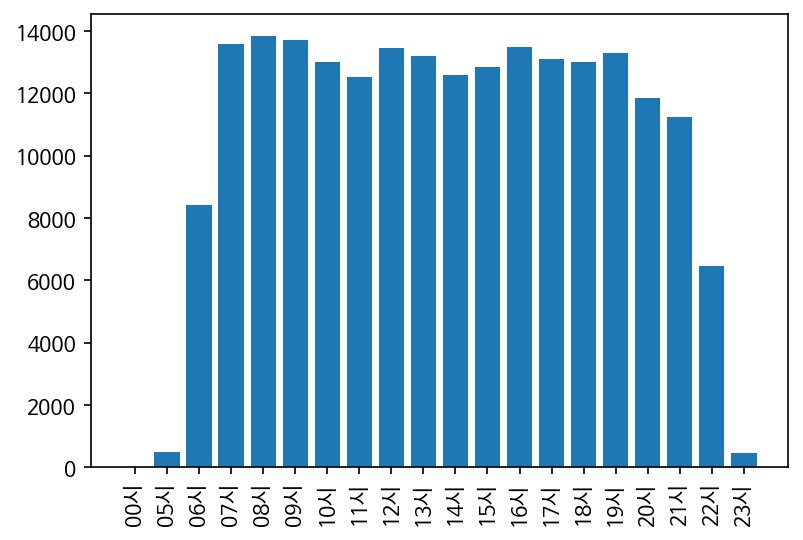

In [ ]:
x = train['now_arrive_time'].value_counts().sort_index().index
y = train['now_arrive_time'].value_counts().sort_index().values

plt.figure(dpi=150)
plt.xticks(rotation=90)

plt.bar(x,y)
plt.show()

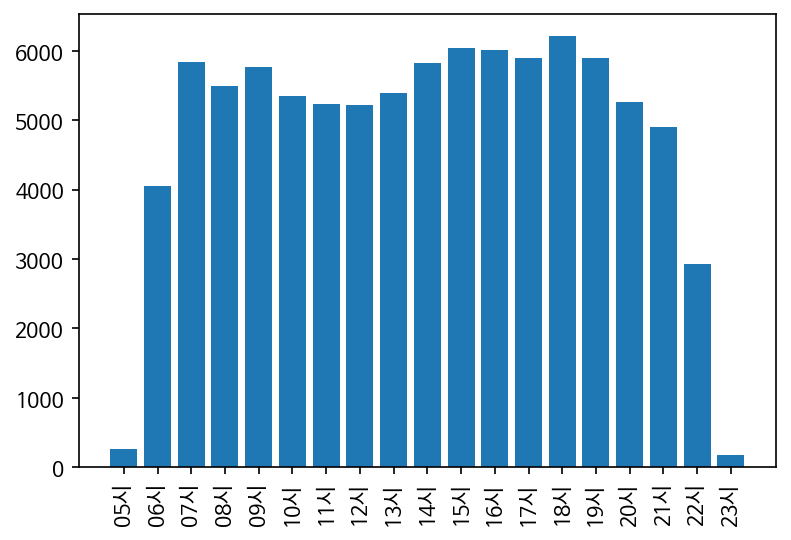

In [ ]:
x = test['now_arrive_time'].value_counts().sort_index().index
y = test['now_arrive_time'].value_counts().sort_index().values

plt.figure(dpi=150)
plt.xticks(rotation=90)

plt.bar(x,y)
plt.show()

### 6) distance

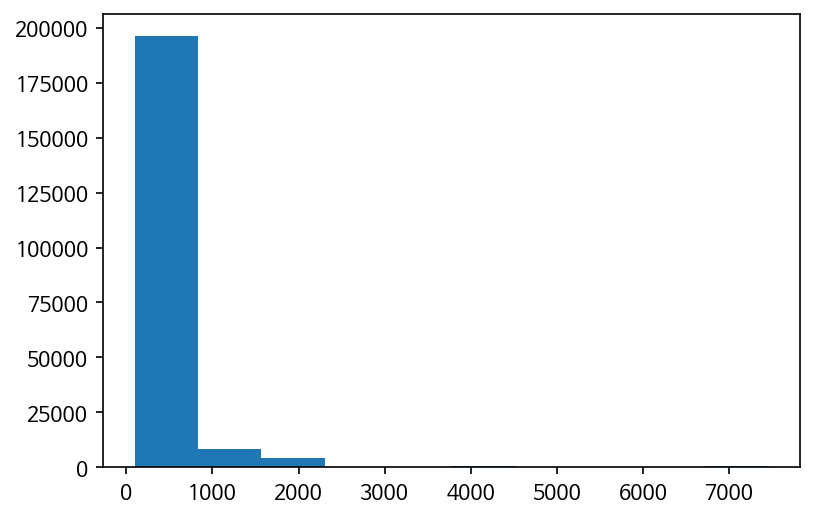

In [ ]:
plt.figure(dpi=150)

plt.hist(train['distance'])
plt.show()

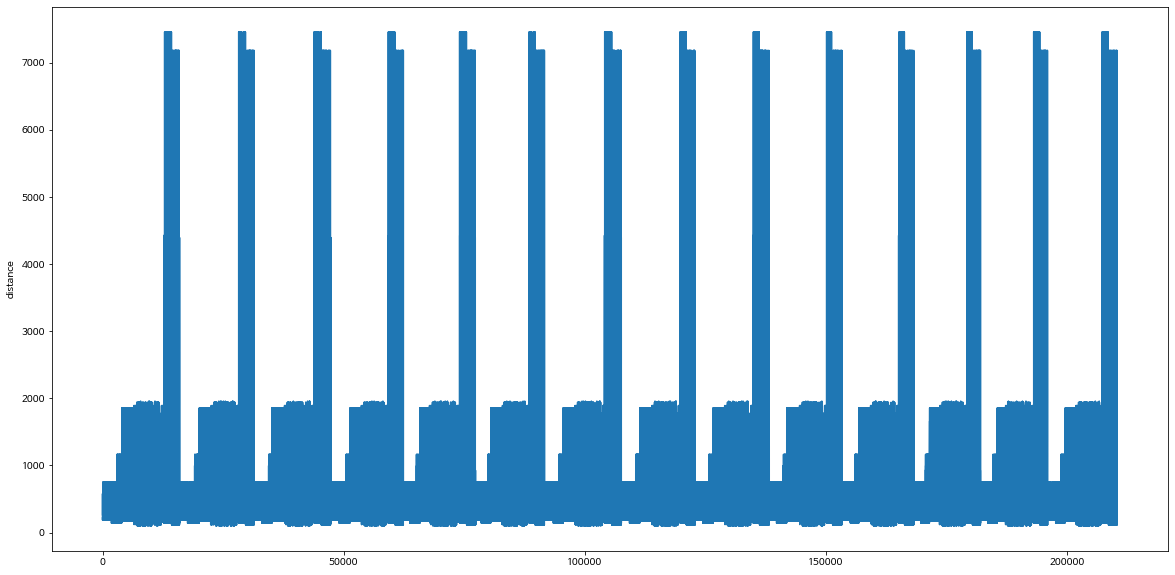

In [ ]:
train['distance'].plot(figsize=(20,10))
plt.ylabel('distance')
plt.show()

In [ ]:
train[train['distance'] > 6000]['now_station'].unique()

array(['성판악', '수악교'], dtype=object)

In [ ]:
train[train['distance'] > 6000]['next_station'].unique()

array(['수악교', '성판악'], dtype=object)

In [ ]:
train[train['distance'] > 6000][[	'now_latitude',	'now_longitude']].iloc[0].values

array([ 33.384634, 126.620353])

In [ ]:
train[train['distance'] > 6000][[	'next_latitude',	'next_longitude']].iloc[0].values

array([ 33.334694, 126.61037 ])

In [ ]:
center = [((train[['now_latitude',	'now_longitude']].loc[1].values[0])+(train[['now_latitude',	'now_longitude']].loc[len(train)-1].values[0]))/2, 
          ((train[['now_latitude',	'now_longitude']].loc[1].values[1])+(train[['now_latitude',	'now_longitude']].loc[len(train)-1].values[1]))/2]

m = folium.Map(location=center, zoom_start=11)

locations = [train[train['distance'] > 6000][[	'now_latitude',	'now_longitude']].iloc[0].values, train[train['distance'] > 6000][[	'next_latitude',	'next_longitude']].iloc[0].values]

folium.PolyLine(locations=locations).add_to(m)

m

In [ ]:
train[train['distance'] > 6000]['vh_id'].unique()

array([7983416, 7983417, 7983420, 7983431, 7983441, 7983481, 7983482,
       7983484, 7983400, 7983406, 7983409, 7983414, 7983415, 7983430,
       7983432, 7983439, 7983444, 7983445, 7983485, 7983486, 7983402,
       7983483, 7983412, 7983401])

In [ ]:
center = [((train[['now_latitude',	'now_longitude']].loc[1].values[0])+(train[['now_latitude',	'now_longitude']].loc[len(train)-1].values[0]))/2, 
          ((train[['now_latitude',	'now_longitude']].loc[1].values[1])+(train[['now_latitude',	'now_longitude']].loc[len(train)-1].values[1]))/2]

m = folium.Map(location=center, zoom_start=11)

locations = train[(train['vh_id'] == train[train['distance'] > 6000]['vh_id'].unique()[4]) & (train['date'] == '2019-10-16')][['now_latitude',	'now_longitude']].values

folium.PolyLine(locations=locations).add_to(m)

m

## 2.EDA - feature&target

In [ ]:
def change_time(text:str):
  return int(text[:-1])

train['now_arrive_time'] = train['now_arrive_time'].map(change_time)
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,temp,station_id
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,6,266.0,제대마을,33.457724,126.554014,24,7997025.0,126.55175 126.554014 266.0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,6,333.0,제대아파트,33.458783,126.557353,36,7997025.0,126.554014 126.557353 333.0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,6,415.0,제주대학교,33.459893,126.561624,40,7997025.0,126.557353 126.561624 415.0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),6,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,7997025.0,126.543811 126.542928 578.0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,7,374.0,은남동,33.485822,126.490897,64,7997025.0,126.494923 126.490897 374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21,528.0,삼아아파트,33.251896,126.574417,96,7983486.0,126.57745 126.574417 528.0
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21,280.0,매일올레시장 7번입구,33.249753,126.565959,50,7983486.0,126.568527 126.565959 280.0
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21,114.0,아랑조을거리 입구,33.251084,126.559551,16,7983486.0,126.560303 126.559551 114.0
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21,223.0,평생학습관,33.249504,126.558068,38,7983486.0,126.559551 126.558068 223.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

temp = train.sort_values(by='next_arrive_time')[['now_arrive_time',	'distance',	'next_arrive_time']].reset_index(drop=True)

scaler = MinMaxScaler()

temp[temp.columns] = scaler.fit_transform(temp)
temp

,now_arrive_time,distance,next_arrive_time
0,0.913043,0.000000,0.000000
1,0.521739,0.000000,0.000000
2,0.608696,0.000000,0.000000
3,0.826087,0.000000,0.000000
4,0.391304,0.000000,0.000000
...,...,...,...
210452,0.739130,0.045899,0.969900
210453,0.347826,0.012357,0.969900
210454,0.304348,0.045899,0.977926
210455,0.826087,0.045899,0.989967


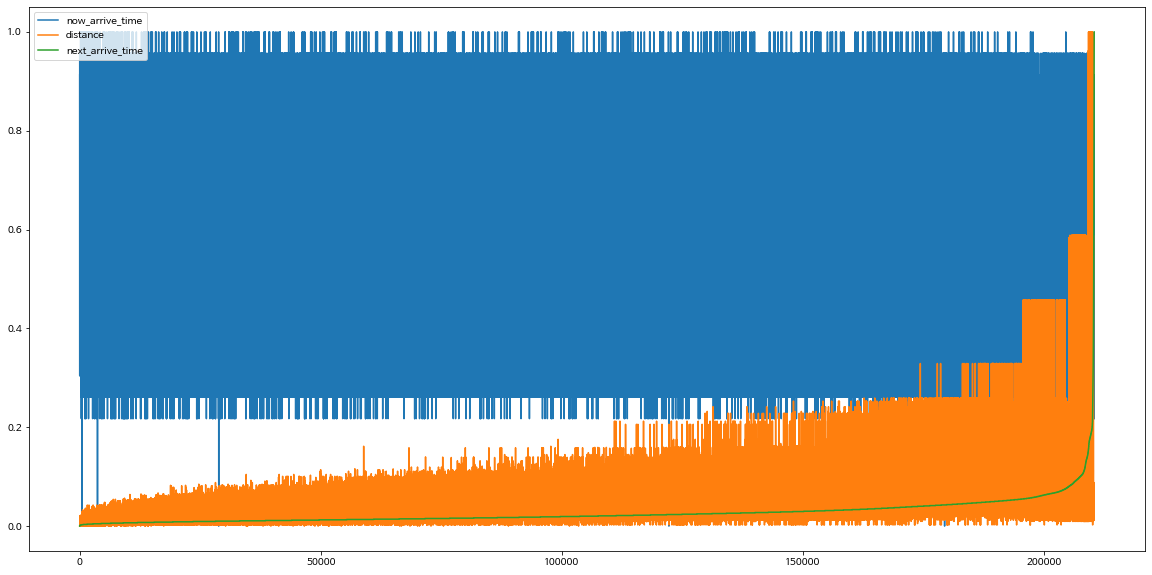

In [ ]:
temp.plot(figsize=(20,10))
plt.show()

## 3.모델링

### 1) 전처리

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/버스/train.csv')
test = pd.read_csv('/content/drive/MyDrive/버스/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/버스/submission_제출양식.csv')

In [ ]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [ ]:
my_list = list(train['vh_id'].unique()) + list(train['now_longitude'].unique()) + list(train['next_longitude'].unique())

In [ ]:
my_dict = {text : i for i, text in enumerate(my_list)}

In [ ]:
def transform_df(df:pd.DataFrame):
  df[['vh_id', 'now_longitude', 'next_longitude']] = df[['vh_id', 'now_longitude', 'next_longitude']].applymap(lambda x:my_dict[x])

  def text_to_time(text:str):
    return int(text[:2])

  df['now_arrive_time'] = df['now_arrive_time'].map(text_to_time)
  
  return df

In [ ]:
train = transform_df(train)
test = transform_df(test)

In [ ]:
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,0,360-1,33.456267,702,제주대학교입구,6,266.0,제대마을,33.457724,671,24
1,1,2019-10-15,405136001,0,360-1,33.457724,671,제대마을,6,333.0,제대아파트,33.458783,672,36
2,2,2019-10-15,405136001,0,360-1,33.458783,672,제대아파트,6,415.0,제주대학교,33.459893,673,40
3,3,2019-10-15,405136001,0,360-1,33.479705,705,남국원(아라방면),6,578.0,제주여자중고등학교(아라방면),33.484860,674,42
4,4,2019-10-15,405136001,0,360-1,33.485662,684,도호동,7,374.0,은남동,33.485822,675,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,96,281-2,33.255783,1195,비석거리,21,528.0,삼아아파트,33.251896,993,96
210453,210453,2019-10-28,405328102,96,281-2,33.248595,991,동문로터리,21,280.0,매일올레시장 7번입구,33.249753,980,50
210454,210454,2019-10-28,405328102,96,281-2,33.251891,989,서귀포시 구 버스터미널,21,114.0,아랑조을거리 입구,33.251084,988,16
210455,210455,2019-10-28,405328102,96,281-2,33.251084,988,아랑조을거리 입구,21,223.0,평생학습관,33.249504,987,38


In [ ]:
train = train[train['next_arrive_time'] <= 1000]

In [ ]:
features = ['vh_id', 'now_longitude', 'now_arrive_time', 'distance', 'next_longitude']
target = 'next_arrive_time'

In [ ]:
X = train[features]

In [ ]:
y = train[target]

### 2) validation셋 구축

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.1, shuffle=False)

In [ ]:
X_train

,vh_id,now_longitude,now_arrive_time,distance,next_longitude
0,0,702,6,266.0,671
1,0,671,6,333.0,672
2,0,672,6,415.0,673
3,0,705,6,578.0,674
4,0,684,7,374.0,675
...,...,...,...,...,...
189407,47,1092,20,1070.0,1069
189408,47,1069,20,834.0,1119
189409,47,1119,20,571.0,805
189410,47,805,20,315.0,1094


In [ ]:
X_valid

,vh_id,now_longitude,now_arrive_time,distance,next_longitude
189412,47,1032,20,417.0,1033
189413,47,1034,20,588.0,1035
189414,47,1035,20,992.0,1036
189415,47,1067,20,407.0,1037
189416,47,1037,20,249.0,953
...,...,...,...,...,...
210452,96,1195,21,528.0,993
210453,96,991,21,280.0,980
210454,96,989,21,114.0,988
210455,96,988,21,223.0,987


### 3) 랜덤포레스트 모델

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(pred, real):
  return mean_squared_error(pred, real)**0.5

In [ ]:
def make_plot():
  RMSE = rmse(y_pred, y_valid)

  plt.figure(dpi=150)

  plt.title('RMSE : ' + str(RMSE)[:8])

  plt.plot(y_valid.reset_index(drop=True), alpha=0.6, label='real')
  plt.plot(y_pred, alpha=0.6, label='pred')

  plt.legend()
  plt.show()

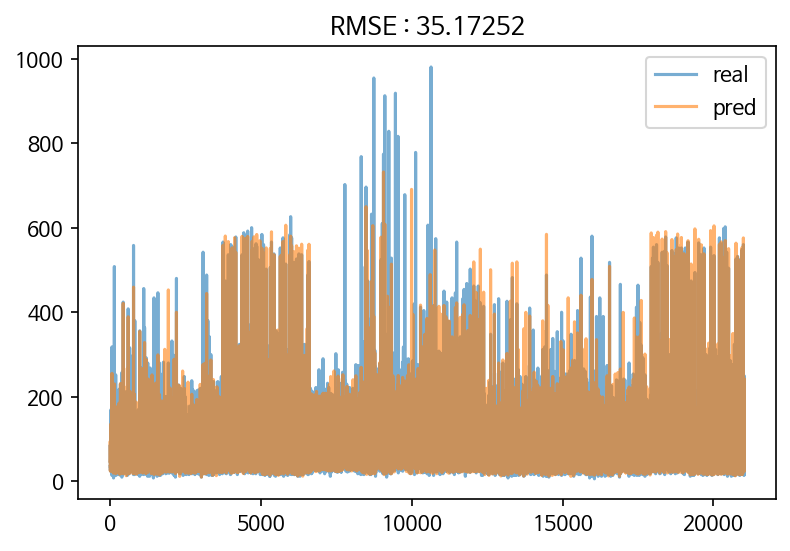

In [ ]:
make_plot()

### 4) xgboost 모델

In [ ]:
import xgboost as xgb

# model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 3000)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators = 3000, tree_method='gpu_hist')

model.fit(X_train,y_train, eval_set=[(X_valid,y_valid)],
          eval_metric = 'rmse',
          early_stopping_rounds=10,
          verbose=5
          )

y_pred = model.predict(X_valid)

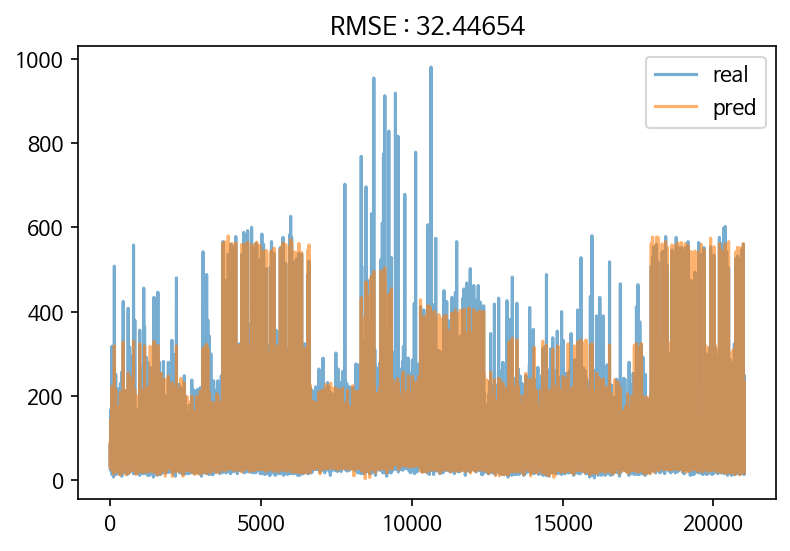

In [ ]:
make_plot()

### 5) catboost 모델

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
X_train

,vh_id,now_longitude,now_arrive_time,distance,next_longitude
0,0,702,6,266.0,671
1,0,671,6,333.0,672
2,0,672,6,415.0,673
3,0,705,6,578.0,674
4,0,684,7,374.0,675
...,...,...,...,...,...
189407,47,1092,20,1070.0,1069
189408,47,1069,20,834.0,1119
189409,47,1119,20,571.0,805
189410,47,805,20,315.0,1094


In [ ]:
cat_features = [0,1,4]

In [ ]:
model = CatBoostRegressor(task_type='GPU')

model.fit(X_train, y_train,
          eval_set=(X_valid,y_valid),
          cat_features=cat_features,
          use_best_model=True,
          verbose=True
          )

y_pred = model.predict(X_valid)

Learning rate set to 0.109402
0:	learn: 62.1745251	test: 61.0515140	best: 61.0515140 (0)	total: 71ms	remaining: 1m 10s
1:	learn: 59.1730982	test: 57.8848919	best: 57.8848919 (1)	total: 163ms	remaining: 1m 21s
2:	learn: 56.5690597	test: 55.1656740	best: 55.1656740 (2)	total: 241ms	remaining: 1m 20s
3:	learn: 54.4461442	test: 52.9630544	best: 52.9630544 (3)	total: 318ms	remaining: 1m 19s
4:	learn: 52.6012943	test: 50.9617874	best: 50.9617874 (4)	total: 392ms	remaining: 1m 17s
5:	learn: 50.9962410	test: 49.2599605	best: 49.2599605 (5)	total: 469ms	remaining: 1m 17s
6:	learn: 49.6480826	test: 47.8083264	best: 47.8083264 (6)	total: 556ms	remaining: 1m 18s
7:	learn: 48.4597992	test: 46.6226292	best: 46.6226292 (7)	total: 676ms	remaining: 1m 23s
8:	learn: 47.4358980	test: 45.6063579	best: 45.6063579 (8)	total: 807ms	remaining: 1m 28s
9:	learn: 46.4468399	test: 44.5534274	best: 44.5534274 (9)	total: 932ms	remaining: 1m 32s
10:	learn: 45.6911584	test: 43.8256188	best: 43.8256188 (10)	total: 1.0

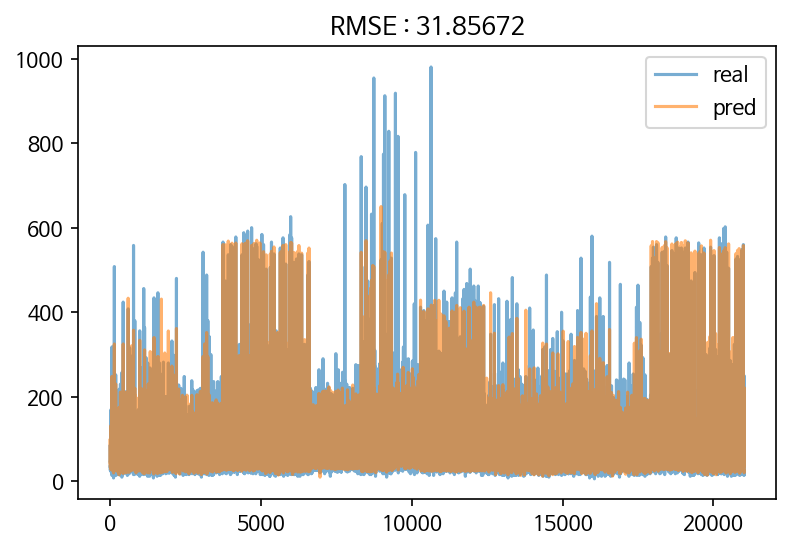

In [ ]:
make_plot()

In [ ]:
model = CatBoostRegressor(task_type='GPU')

model.fit(X_train, y_train,
          eval_set=(X_valid,y_valid),
          cat_features=cat_features,
          use_best_model=True,
          verbose=True
          )

y_pred = model.predict(test[features])

Learning rate set to 0.109402
0:	learn: 62.1745251	test: 61.0515140	best: 61.0515140 (0)	total: 72ms	remaining: 1m 11s
1:	learn: 59.1730982	test: 57.8848919	best: 57.8848919 (1)	total: 155ms	remaining: 1m 17s
2:	learn: 56.5690597	test: 55.1656740	best: 55.1656740 (2)	total: 220ms	remaining: 1m 13s
3:	learn: 54.4461442	test: 52.9630544	best: 52.9630544 (3)	total: 286ms	remaining: 1m 11s
4:	learn: 52.6012943	test: 50.9617874	best: 50.9617874 (4)	total: 307ms	remaining: 1m 1s
5:	learn: 50.9962410	test: 49.2599605	best: 49.2599605 (5)	total: 328ms	remaining: 54.3s
6:	learn: 49.6480826	test: 47.8083264	best: 47.8083264 (6)	total: 363ms	remaining: 51.5s
7:	learn: 48.4597992	test: 46.6226292	best: 46.6226292 (7)	total: 516ms	remaining: 1m 4s
8:	learn: 47.4358980	test: 45.6063579	best: 45.6063579 (8)	total: 627ms	remaining: 1m 9s
9:	learn: 46.4468399	test: 44.5534274	best: 44.5534274 (9)	total: 736ms	remaining: 1m 12s
10:	learn: 45.6911584	test: 43.8256188	best: 43.8256188 (10)	total: 959ms	re

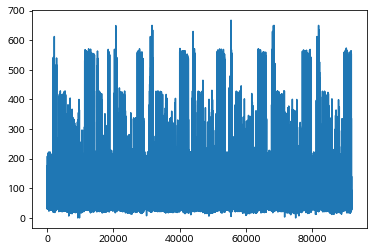

In [ ]:
plt.plot(y_pred)
plt.show()

In [ ]:
submission[target] = y_pred
submission.to_csv('submission.csv', index=False)